## 数据集描述
数据集2：Oakland Crime Statistics 2011 to 2016
包含records-for-2011.csv到records-for-2016.csv共六个文件

属性列表：
Agency，Create Time，Location，Area Id，Beat，Priority，Incident Type Id，Incident Type，Description，Event Number，Closed Time

具体函数实现与wine-review数据集相同，细节参见wine-review数据集处理部分。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

def Nominal(dataframe):
    resdic = {}
    col1 = dataframe["Agency"].value_counts()
    #col2 = dataframe["Create Time"].value_counts()
    col3 = dataframe["Location"].value_counts()
    col4 = dataframe["Area Id"].value_counts()
    col5 = dataframe["Beat"].value_counts()
    #col6 = dataframe["Priority"].value_counts()
    col7 = dataframe["Incident Type Id"].value_counts()
    col8 = dataframe["Incident Type Description"].value_counts()
    #col9 = dataframe["Event Number"].value_counts()
    #col10 = dataframe["Closed Time"].value_counts()

    resdic["Agency"] = dict(col1)
    #resdic["col2"] = dict(col2)
    resdic["Location"] = dict(col3)
    resdic["Area Id"] = dict(col4)
    resdic["Beat"] = dict(col5)
    #resdic["Priority"] = dict(col6)
    resdic["Incident Type Id"] = dict(col7)
    resdic["Incident Type Description"] = dict(col8)
    #resdic["col9"] = dict(col9)
    #resdic["col10"] = dict(col10)
    return resdic


## Nominal(dataframe)为处理标称属性的函数
通过Series类中的value_counts()方法统计各个可能取值的频数，并存在字典中，需要的话可以存到文件中

In [1]:
def Numeric(Ndf):
    describe = Ndf.describe()
    print(describe)
    
    Ndf = Ndf.dropna(subset=["Priority"])
    plt.hist(Ndf["Priority"])
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("Priority--Frequency distribution histogram")
    plt.show()

    fig1 = plt.figure()
    stats.probplot(Ndf["Priority"], plot=plt)
    plt.show()

    plt.boxplot(Ndf["Priority"])
    plt.ylabel("Priority")
    plt.show()

## Nominal(dataframe)为处理标称属性的函数
本数据集中只有Priority一个数值属性。使用describe()方法统计数值属性指标，对Priority分别绘制直方图，qq图和盒图。

In [3]:
def high_feq_process(df1):
    Ndf = pd.DataFrame(df1, columns=["Priority"])
    feq_price = Ndf["Priority"].value_counts()
    fill_value = {
        "Priority": list(dict(feq_price))[0]
    }
    Ndf = Ndf.fillna(value=fill_value)  #without inplace = True, the value in source df won't change
    Numeric(Ndf)
    

## 通过最高频值补全缺失值
使用Value_count()方法计算得到要计算的数值属性列不同取值的频率，然后使用字典及列表转换在通过下标或得到频率最高的取值。使用fillna()方法填补对应列的缺失值并调用之前的可视化函数，来可视化填补缺失值后的结果。

In [4]:
def relation_process(df1):
    Ndf = pd.DataFrame(df1, columns=["Priority"])
    Ndf.interpolate(method="values")
    Numeric(Ndf)
    

## 通过属性的相关关系来填补缺失值
插值法就是一个从已知点近似计算未知点的近似计算方法，即构造一个多项式函数，使其通过所有已知点，然后用求得的函数预测位置点。pandas内置有interpolate()方法进行插值操作，该方法默认为线性插值即method=linear。除此之外，还有{‘linear’, ‘time’, ‘index’, ‘values’}等方法。这里选择简单的value方法。

In [5]:
def similarity_process(df1, k_num):
    OriNdf = pd.DataFrame(df1, columns=["Area Id", "Priority"])
    Ndf = pd.DataFrame(df1, columns=["Area Id", "Priority"])
    #print(len(Ndf))
    Ndf = Ndf.dropna(axis=0, how="any")
    #Ndf.dropna(subset=["points"])
    #print(len(Ndf))
    clf = KNeighborsClassifier(n_neighbors=k_num, weights="distance")
    clf.fit(np.array(list(Ndf["Area Id"])).reshape(-1, 1), np.array(list(Ndf["Priority"])).reshape(-1, 1))  #reshape(1, -1) rather than reshape(-1, 1)

    for i in range(0, len(OriNdf)):
        if pd.isna(OriNdf.iloc[i]["Priority"]):
            new_value = clf.predict(np.array([OriNdf.iloc[i]["Area Id"]]).reshape(-1, 1))
            OriNdf.set_value(i, "Priority", new_value)
    Numeric(OriNdf)


In [6]:
dataframe = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-2011.csv")
for year in range(2011, 2017):
    print("year:", year)
    dataframe = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-{}.csv".format(str(year)))
    columnsList = list(dataframe)
    if "Location 1" in columnsList:
        dataframe.rename(columns={"Location 1": "Location"}, inplace = True)
    elif "Location " in columnsList:
        dataframe.rename(columns={"Location ": "Location"}, inplace=True)
    order = ["Agency", "Create Time", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Incident Type Description", "Event Number", "Closed Time"]
    temdf = dataframe[order]
    #res = Nominal(dataframe)

    dataframe = dataframe.append(temdf, ignore_index=True)
Nominal(dataframe)


year: 2011
year: 2012


d:\python\python36\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


year: 2013
year: 2014
year: 2015
year: 2016


{'Agency': {'OP': 221654},
 'Location': {' INTERNATIONAL BLVD    ': 4312,
  ' AV&INTERNATIONAL BLVD    ': 3658,
  ' MACARTHUR BLVD    ': 3626,
  ' BROADWAY     ': 2944,
  ' 7TH ST    ': 2446,
  ' FOOTHILL BLVD    ': 2104,
  ' TELEGRAPH AV    ': 1750,
  ' SAN PABLO AV   ': 1530,
  ' AV&MACARTHUR BLVD    ': 1474,
  ' FRUITVALE AV    ': 1418,
  ' BANCROFT AV    ': 1414,
  ' ST&BROADWAY     ': 1382,
  ' HIGH ST    ': 1356,
  ' ST&TELEGRAPH AV    ': 1276,
  ' 73RD AV    ': 1190,
  ' HEGENBERGER RD    ': 1182,
  ' AV&FOOTHILL BLVD    ': 1108,
  ' LAKESHORE AV    ': 1018,
  ' WEBSTER ST    ': 930,
  ' E 12TH ST   ': 910,
  ' AV&BANCROFT AV    ': 880,
  ' HARRISON ST    ': 872,
  ' ST&MARKET ST    ': 854,
  ' GRAND AV    ': 832,
  ' MARKET ST    ': 828,
  ' 35TH AV    ': 816,
  ' ST&MARTIN LUTHER KING JR WY ': 802,
  ' 14TH ST    ': 802,
  ' 34TH ST    ': 742,
  ' ST&SAN PABLO AV   ': 726,
  ' EMBARCADERO     ': 724,
  ' COLLEGE AV    ': 666,
  ' SAN LEANDRO ST   ': 654,
  ' ADELINE ST    ': 6

Oakland Crime Statistics 2011 to 2016 包含records-for-2011.csv到records-for-2016.csv共六个文件，为了处理方便，首先将六个文件读进一个dataframe（需要将列名统一并确定相同的顺序，然后合并）

            Priority
count  221654.000000
mean        1.778438
std         0.415298
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


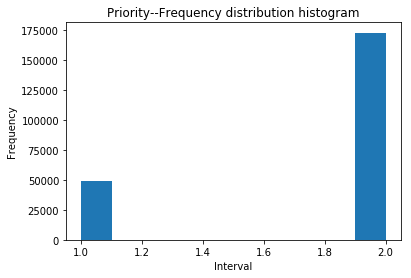

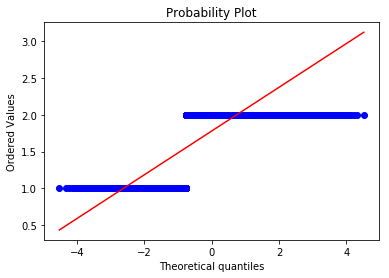

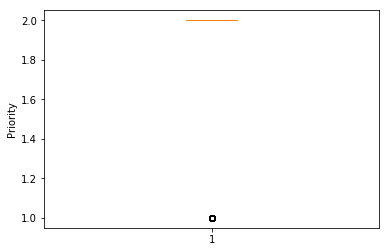

In [7]:
Numeric(pd.DataFrame(dataframe, columns=["Priority"]))

In [ ]:
从数据来看，Priority属性只有两个取值，因此不具有数值属性的分析价值。

            Priority
count  221656.000000
mean        1.778440
std         0.415297
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


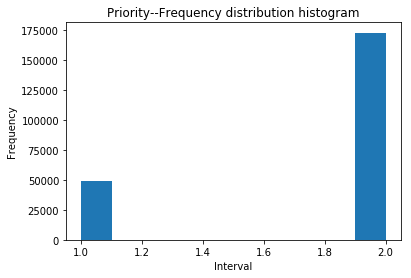

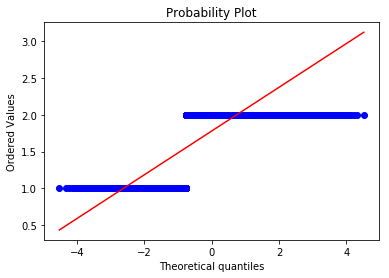

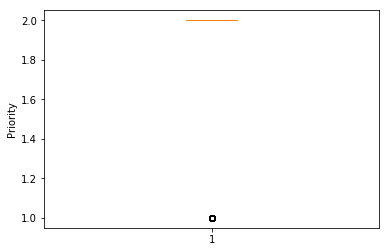

In [8]:
high_feq_process(pd.DataFrame(dataframe, columns=["Priority"]))

            Priority
count  221654.000000
mean        1.778438
std         0.415298
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


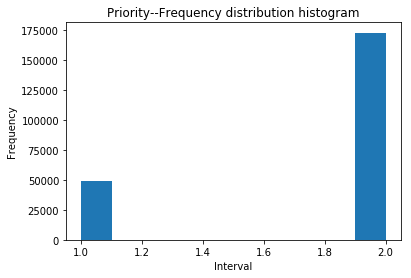

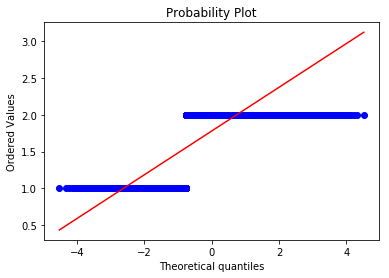

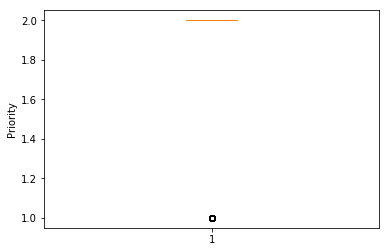

In [9]:
relation_process(pd.DataFrame(dataframe, columns=["Priority"]))